In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [6]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [7]:
# Find table and column names first before reflecting into a new database
# table
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [7]:
# measurement table
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [8]:
# station table
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [9]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect = True)

In [10]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [11]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [13]:
# Explore the data set before following pre-determined questions
# measurements - total dates 
session.query(func.count(Measurement.date)).all()

[(19550)]

In [14]:
# measurements -first date
session.query(Measurement.date).order_by(Measurement.date).first()

('2010-01-01')

In [15]:
# measurement -last date
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [35]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

# Calculate the date one year from the last date in data set.
year_todate = dt.date(2017, 8, 23) - dt.timedelta(days=365)
# print(year_todate)

# Perform a query to retrieve the data and precipitation scores
precipitate = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > year_todate).order_by(Measurement.date).all()
# print(precipitate)

# Save the query results as a Pandas DataFrame and set the index to the date column
precipitate_df = pd.DataFrame(precipitate)
# precipitate_df.head(50)
precipitate_df.set_index('date').head(20)

# Sort the dataframe by date - did this through my query 

,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22
2016-08-24,2.15
2016-08-24,1.45
2016-08-25,0.08
2016-08-25,0.08


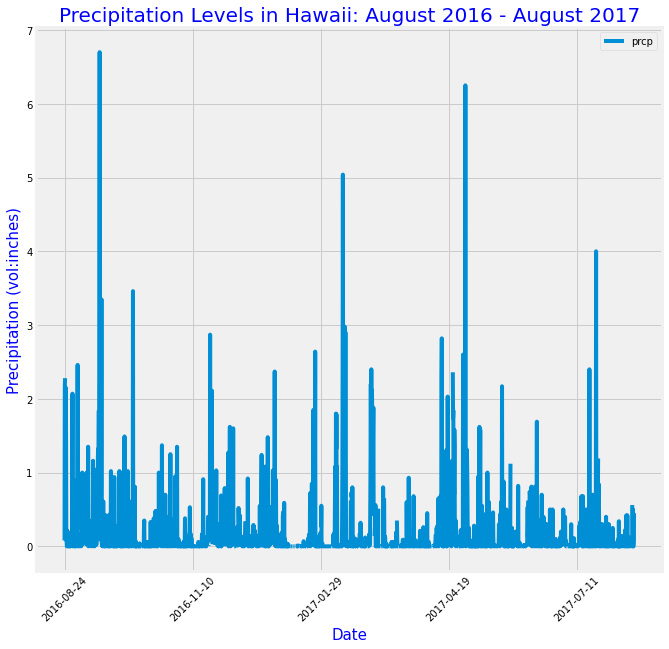

In [52]:
# Use Pandas Plotting with Matplotlib to plot the data
precipitate_df.plot('date', 'prcp', figsize=(10,10), rot=45)
plt.title('Precipitation Levels in Hawaii: August 2016 - August 2017', fontsize=20, color='blue')
plt.xlabel('Date', fontsize=15, color='blue')
plt.ylabel('Precipitation (vol:inches)', fontsize=15, color='blue')
plt.savefig('../Images/precipitation_plot.png')

In [53]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitate_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [54]:
# Design a query to calculate the total number stations in the dataset
session.query(Station.id).count()

9

In [63]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active_stations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [64]:
# able to call as it's own
top_active = active_stations[0][0]
top_active

'USC00519281'

In [69]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# lowest temperature
low_low_low = session.query(func.min(Measurement.tobs)).filter(Measurement.station == top_active).all()
low_low_low

[(54.0)]

In [70]:
# highest temperature
watermelon_high = session.query(func.max(Measurement.tobs)).filter(Measurement.station == top_active).all()
watermelon_high

[(85.0)]

In [71]:
# average temperature
average_joe = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == top_active).all()
average_joe

[(71.66378066378067)]

In [74]:
# one more time, but all in one go. 
session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).filter(Measurement.station == top_active).all()

[(54.0, 85.0, 71.66378066378067)]

In [75]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station 
waihee = session.query(Measurement.date, Measurement.tobs).filter(Measurement.station == top_active).filter(Measurement.date >= year_todate).all()

waihee_df = pd.DataFrame(waihee)
waihee_df.head()

,date,tobs
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0


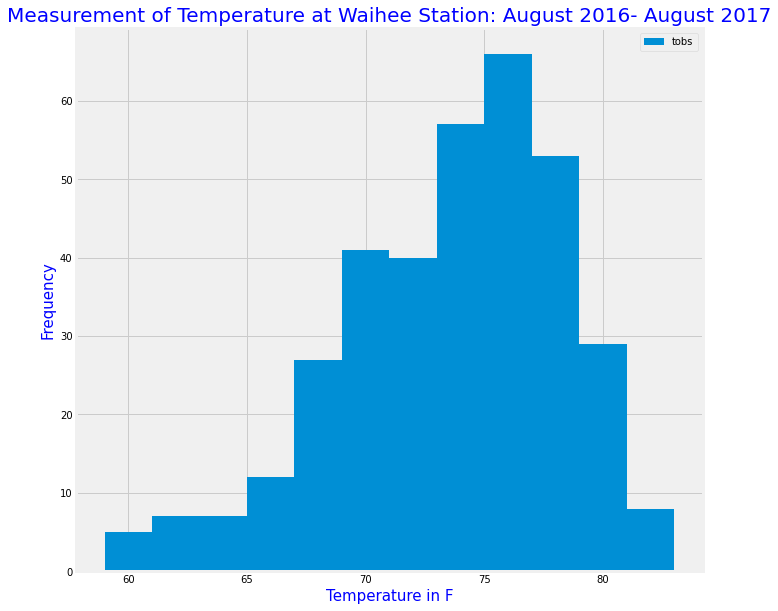

In [81]:
# and plot the results as a histogram
waihee_df.plot(kind='hist', bins=12, figsize=(10,10))
plt.title('Measurement of Temperature at Waihee Station: August 2016- August 2017', fontsize=20, color='blue')
plt.xlabel('Temperature in F', fontsize=15, color='blue')
plt.ylabel('Frequency', fontsize=15, color='blue')
plt.savefig('../Images/Waihee_histogram.png')

# Close session

In [82]:
# Close Session
session.close()